In [1]:
import numpy as np
import pandas as pd
import ydata_profiling as yp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sweetviz as sv

import warnings
warnings.filterwarnings(action = 'ignore')

In [70]:
df_economy = pd.read_csv('../Data/economy.csv')
df_business = pd.read_csv('../Data/business.csv')

In [71]:
df_economy.head()

,date,airline,ch_code,num_code,from,time_taken,stop,to,price
0,11/2/2022,SpiceJet,SG,8709,Delhi,02h 10m,non-stop,Mumbai,"5,953"
1,11/2/2022,SpiceJet,SG,8157,Delhi,02h 20m,non-stop,Mumbai,"5,953"
2,11/2/2022,AirAsia,I5,764,Delhi,02h 10m,non-stop,Mumbai,"5,956"
3,11/2/2022,Vistara,UK,995,Delhi,02h 15m,non-stop,Mumbai,"5,955"
4,11/2/2022,Vistara,UK,963,Delhi,02h 20m,non-stop,Mumbai,"5,955"


In [72]:
df_business.head()

,date,airline,ch_code,num_code,from,time_taken,stop,to,price
0,11/2/2022,Air India,AI,868,Delhi,02h 00m,non-stop,Mumbai,"25,612"
1,11/2/2022,Air India,AI,624,Delhi,02h 15m,non-stop,Mumbai,"25,612"
2,11/2/2022,Air India,AI,531,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"42,220"
3,11/2/2022,Air India,AI,839,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"44,450"
4,11/2/2022,Air India,AI,544,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"46,690"


In [73]:
df_business.shape

(93487, 9)

In [74]:
df_economy.head()

,date,airline,ch_code,num_code,from,time_taken,stop,to,price
0,11/2/2022,SpiceJet,SG,8709,Delhi,02h 10m,non-stop,Mumbai,"5,953"
1,11/2/2022,SpiceJet,SG,8157,Delhi,02h 20m,non-stop,Mumbai,"5,953"
2,11/2/2022,AirAsia,I5,764,Delhi,02h 10m,non-stop,Mumbai,"5,956"
3,11/2/2022,Vistara,UK,995,Delhi,02h 15m,non-stop,Mumbai,"5,955"
4,11/2/2022,Vistara,UK,963,Delhi,02h 20m,non-stop,Mumbai,"5,955"


In [75]:
df_economy.shape

(206774, 9)

In [76]:
df_economy['Class'] = 'Economy'
df_business['Class'] = 'Business'

In [77]:
df = pd.concat([df_economy, df_business], axis = 0)

In [10]:
yp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
my_report = sv.analyze(df)
my_report.show_html('FinalReport.html')

                                             |                                             | [  0%]   00:00 ->…

Report FinalReport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [78]:
df.head()

,date,airline,ch_code,num_code,from,time_taken,stop,to,price,Class
0,11/2/2022,SpiceJet,SG,8709,Delhi,02h 10m,non-stop,Mumbai,"5,953",Economy
1,11/2/2022,SpiceJet,SG,8157,Delhi,02h 20m,non-stop,Mumbai,"5,953",Economy
2,11/2/2022,AirAsia,I5,764,Delhi,02h 10m,non-stop,Mumbai,"5,956",Economy
3,11/2/2022,Vistara,UK,995,Delhi,02h 15m,non-stop,Mumbai,"5,955",Economy
4,11/2/2022,Vistara,UK,963,Delhi,02h 20m,non-stop,Mumbai,"5,955",Economy


In [79]:
df.shape

(300261, 10)

In [80]:
all_col = list(df.columns)
num_col = list(df._get_numeric_data())
cat_col = list(set(all_col) - set(num_col))

print(f"All features : {all_col}")
print(f"\nNumeric features : {num_col}")
print(f"\nCategorical features : {cat_col}")

All features : ['date', 'airline', 'ch_code', 'num_code', 'from', 'time_taken', 'stop', 'to', 'price', 'Class']

Numeric features : ['num_code']

Categorical features : ['to', 'airline', 'time_taken', 'from', 'stop', 'ch_code', 'date', 'Class', 'price']


In [81]:
def pie_plot(x, title):
    print(df[x].value_counts())

    sns.set()
    plt.figure(figsize = (10, 10))
    plt.pie(x = df[x].value_counts(normalize = True), autopct = '%1.1f%%')
    plt.legend(labels = df[x].value_counts().index, loc = 'upper left', title = title)
    my_circle = plt.Circle((0, 0), 0.7, color='white')
    p = plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(title)
    plt.show()

Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: airline, dtype: int64


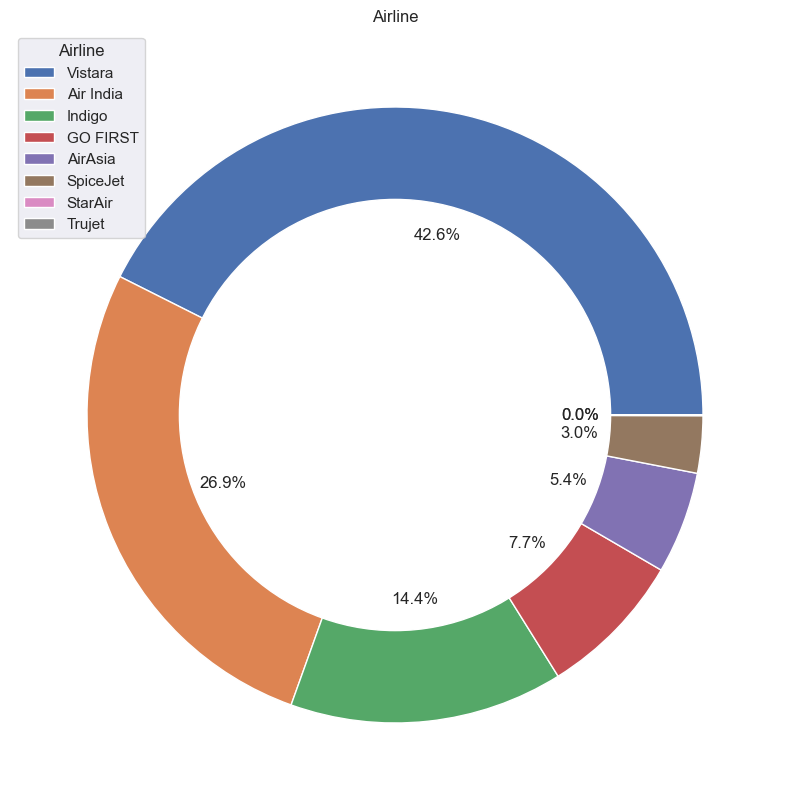

In [82]:
pie_plot(x = 'airline', title = 'Airline')

In [83]:
# Dropping some rows in Airline, due to less number of available data
df = df[df['airline'] != 'StarAir']
df = df[df['airline'] != 'Trujet']

Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64


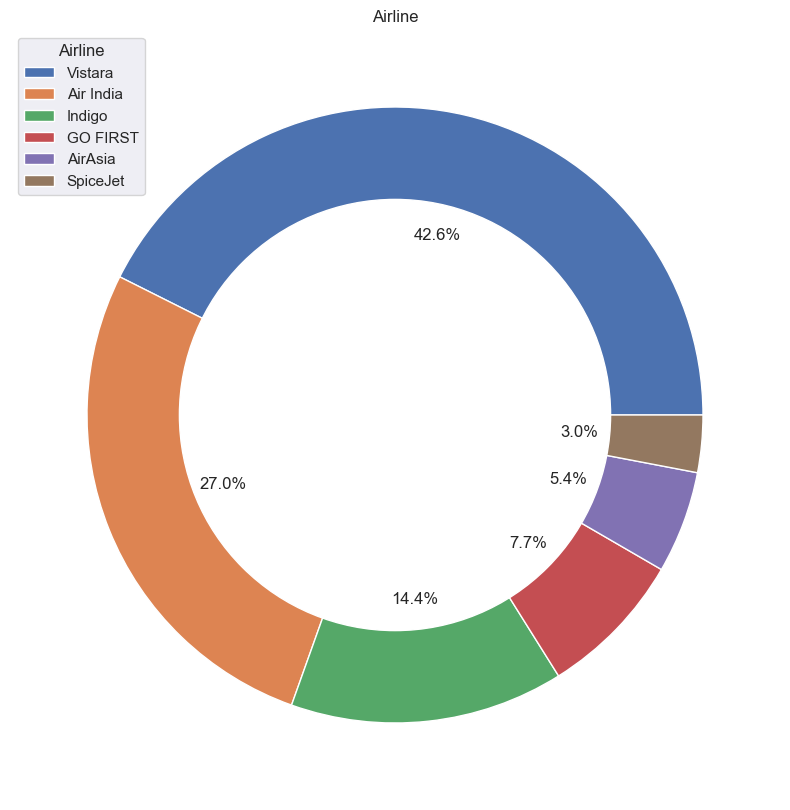

In [84]:
pie_plot(x = 'airline', title = 'Airline')

In [85]:
df['ch_code'].value_counts()

UK    127859
AI     80894
6E     43120
G8     23177
I5     16098
SG      9011
Name: ch_code, dtype: int64

In [86]:
df['Flight code'] = df['ch_code'] + "-" + df['num_code'].astype('str')

In [87]:
df['Flight code'].value_counts().reset_index()

,index,Flight code
0,UK-706,3235
1,UK-772,2741
2,UK-720,2650
3,UK-836,2542
4,UK-822,2468
...,...,...
1556,SG-9923,1
1557,6E-6474,1
1558,6E-865,1
1559,G8-705,1


Delhi        61345
Mumbai       60896
Bangalore    52064
Kolkata      46347
Hyderabad    40807
Chennai      38700
Name: from, dtype: int64


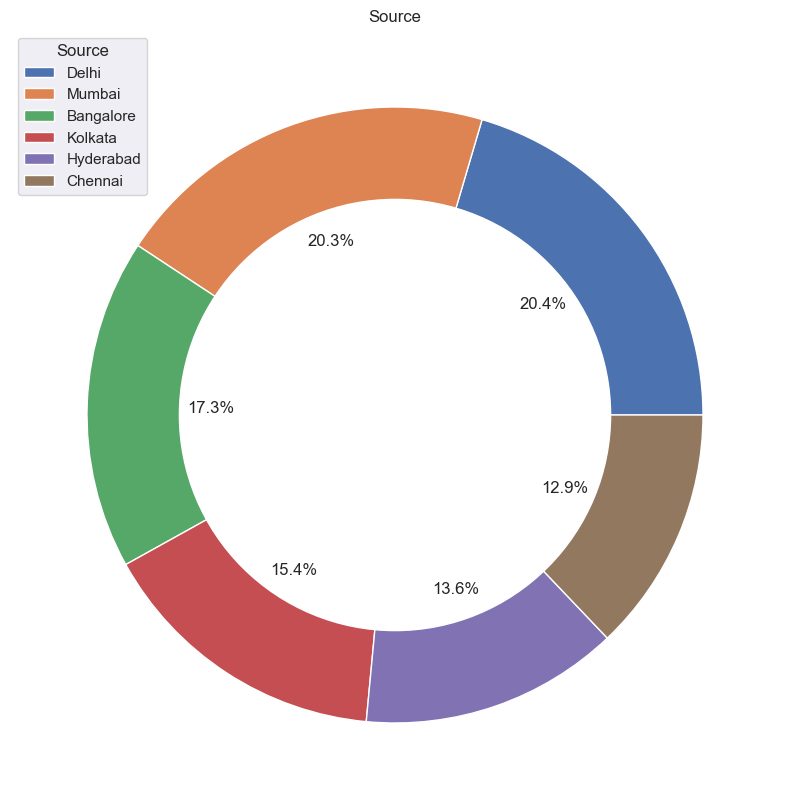

In [88]:
pie_plot(x = 'from', title = 'Source')

In [89]:
df['time_taken'].value_counts().reset_index()

,index,time_taken
0,02h 10m,4242
1,02h 15m,4036
2,02h 45m,2879
3,02h 05m,2755
4,02h 50m,2323
...,...,...
474,40h 45m,1
475,38h 30m,1
476,42h 00m,1
477,1.01h m,1


In [90]:
df['time_taken'].str.split('h', expand = True)

,0,1
0,02,10m
1,02,20m
2,02,10m
3,02,15m
4,02,20m
...,...,...
93482,10,05m
93483,10,25m
93484,13,50m
93485,10,00m


In [91]:
df['hour'] = df['time_taken'].str.split('h', expand = True)[0]
df['minute'] = df['time_taken'].str.split('h', expand = True)[1]

In [92]:
df['hour'] = df['hour'].replace('h', '').astype('float')

In [93]:
df['minute'].value_counts().reset_index()

,index,minute
0,10m,30327
1,15m,27951
2,05m,26497
3,00m,25585
4,30m,25030
5,20m,24753
6,55m,24661
7,45m,23670
8,50m,23329
9,25m,23039


In [94]:
df['minute'].str.slice(start = 0, stop = -1).value_counts().reset_index()

,index,minute
0,10,30327
1,15,27951
2,05,26497
3,00,25585
4,30,25030
5,20,24753
6,55,24661
7,45,23670
8,50,23329
9,25,23039


In [95]:
df['minute'] = df['minute'].str.slice(start = 0, stop = -1)

In [96]:
df['minute'].value_counts()

 10    30327
 15    27951
 05    26497
 00    25585
 30    25030
 20    24753
 55    24661
 45    23670
 50    23329
 25    23039
 35    22712
 40    22566
 59       15
 24       15
 04        5
           4
Name: minute, dtype: int64

In [97]:
df['minute'] = df['minute'].replace(' ', 0).astype('int')

In [98]:
df['minute'].value_counts().reset_index()

,index,minute
0,10,30327
1,15,27951
2,5,26497
3,0,25589
4,30,25030
5,20,24753
6,55,24661
7,45,23670
8,50,23329
9,25,23039


In [99]:
df['time_taken(min)'] = ((df['hour'] * 60 ) + df['minute'])

In [100]:
df['stop'].value_counts().reset_index()

,index,stop
0,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,243541
1,non-stop,36004
2,2+-stop,13288
3,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\...,1839
4,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\...,1398
5,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\...,674
6,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t...,381
7,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\...,354
8,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\...,321
9,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswa...,301


In [101]:
df['stop'].str.slice(start = 0, stop = 1).value_counts()

1    250867
n     36004
2     13288
Name: stop, dtype: int64

In [102]:
df['stop'] = df['stop'].str.slice(start = 0, stop = 1).replace('n', 0).astype('int')

1    250867
0     36004
2     13288
Name: stop, dtype: int64


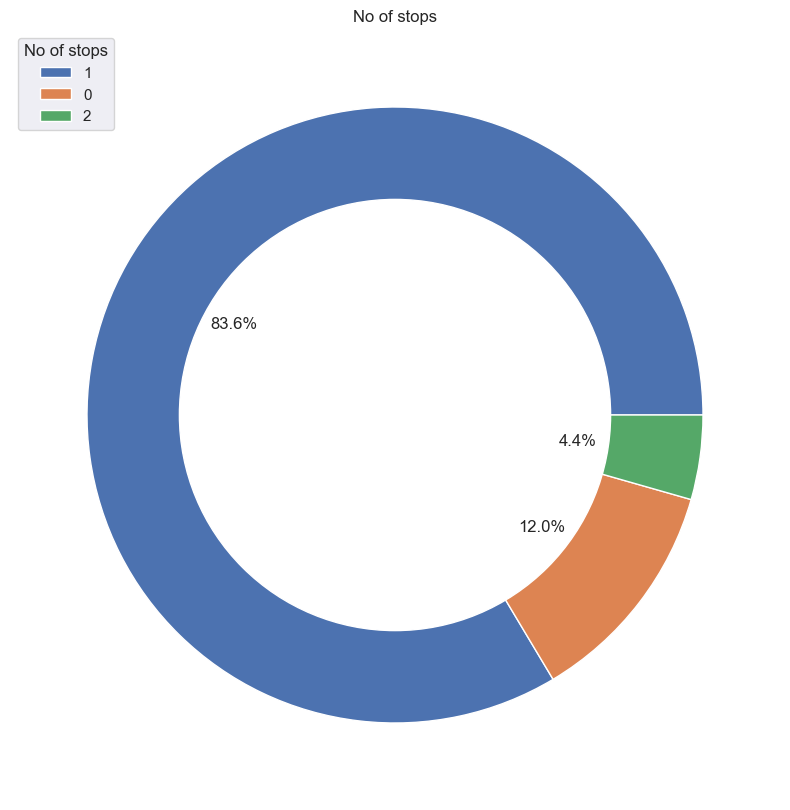

In [103]:
pie_plot(x = 'stop', title = 'No of stops')

Mumbai       59100
Delhi        57361
Bangalore    51068
Kolkata      49535
Hyderabad    42727
Chennai      40368
Name: to, dtype: int64


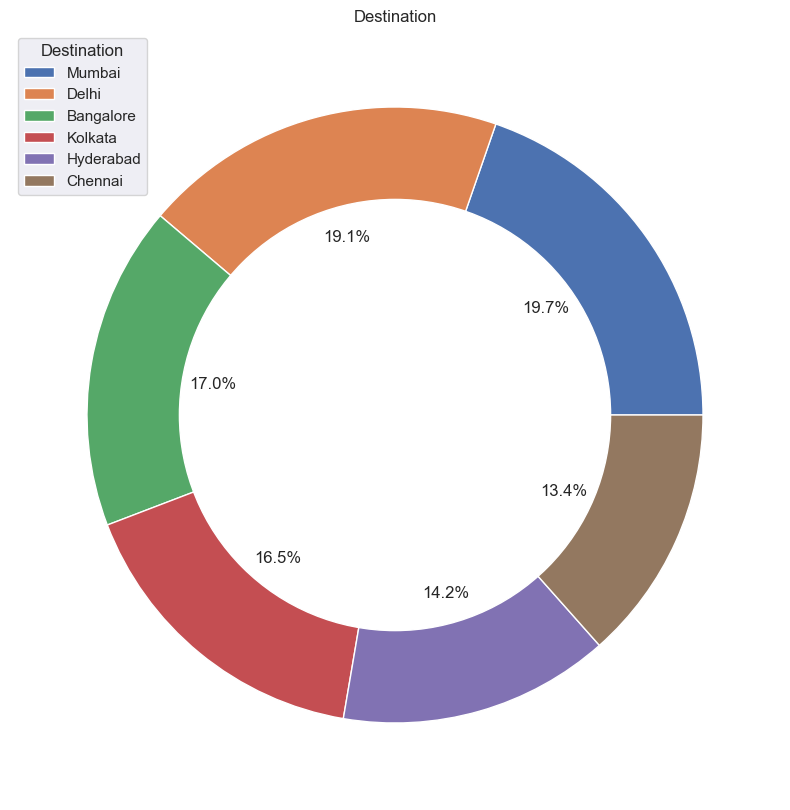

In [104]:
pie_plot(x = 'to', title = 'Destination')

In [105]:
df['price'].head()

0    5,953
1    5,953
2    5,956
3    5,955
4    5,955
Name: price, dtype: object

In [106]:
df['price'] = df['price'].str.replace(',', '').astype('float')

Economy     206672
Business     93487
Name: Class, dtype: int64


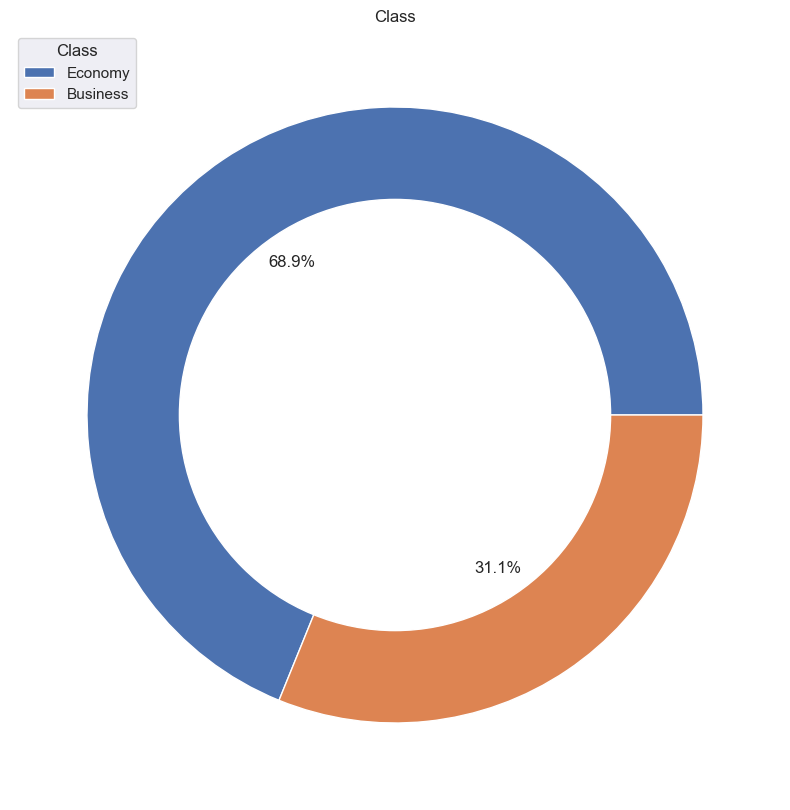

In [107]:
pie_plot(x = 'Class', title = 'Class')

In [108]:
df['price'].head()

0    5953.0
1    5953.0
2    5956.0
3    5955.0
4    5955.0
Name: price, dtype: float64

In [109]:
df.head()

,date,airline,ch_code,num_code,from,time_taken,stop,to,price,Class,Flight code,hour,minute,time_taken(min)
0,11/2/2022,SpiceJet,SG,8709,Delhi,02h 10m,0,Mumbai,5953.0,Economy,SG-8709,2.0,10,130.0
1,11/2/2022,SpiceJet,SG,8157,Delhi,02h 20m,0,Mumbai,5953.0,Economy,SG-8157,2.0,20,140.0
2,11/2/2022,AirAsia,I5,764,Delhi,02h 10m,0,Mumbai,5956.0,Economy,I5-764,2.0,10,130.0
3,11/2/2022,Vistara,UK,995,Delhi,02h 15m,0,Mumbai,5955.0,Economy,UK-995,2.0,15,135.0
4,11/2/2022,Vistara,UK,963,Delhi,02h 20m,0,Mumbai,5955.0,Economy,UK-963,2.0,20,140.0


In [110]:
df.drop(columns = ['date', 'ch_code', 'num_code', 'time_taken', 'hour', 'minute'], axis = 1, inplace = True)

In [111]:
df.head()

,airline,from,stop,to,price,Class,Flight code,time_taken(min)
0,SpiceJet,Delhi,0,Mumbai,5953.0,Economy,SG-8709,130.0
1,SpiceJet,Delhi,0,Mumbai,5953.0,Economy,SG-8157,140.0
2,AirAsia,Delhi,0,Mumbai,5956.0,Economy,I5-764,130.0
3,Vistara,Delhi,0,Mumbai,5955.0,Economy,UK-995,135.0
4,Vistara,Delhi,0,Mumbai,5955.0,Economy,UK-963,140.0


In [112]:
df.to_csv('../Data/cleaned_flight_dataset.csv', index=False)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300159 entries, 0 to 93486
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   airline          300159 non-null  object 
 1   from             300159 non-null  object 
 2   stop             300159 non-null  int32  
 3   to               300159 non-null  object 
 4   price            300159 non-null  float64
 5   Class            300159 non-null  object 
 6   Flight code      300159 non-null  object 
 7   time_taken(min)  300159 non-null  float64
dtypes: float64(2), int32(1), object(5)
memory usage: 19.5+ MB


In [114]:
df.shape

(300159, 8)

In [115]:
df.isnull().sum()

airline            0
from               0
stop               0
to                 0
price              0
Class              0
Flight code        0
time_taken(min)    0
dtype: int64

In [116]:
df.duplicated().sum()

230915

In [117]:
df.drop_duplicates(inplace = True)

In [118]:
df.shape

(69244, 8)

In [119]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
stop,69244.0,0.999682,0.386057,0.0,1.00,1.0,1.00,2.0
price,69244.0,17228.141269,20542.804218,1105.0,5664.75,8937.0,15153.25,123071.0
time_taken(min),69244.0,788.131815,460.904369,50.0,430.00,685.0,1070.00,2990.0


In [120]:
all_col = list(df.columns)
num_col = list(df._get_numeric_data())
cat_col = list(set(all_col) - set(num_col))

print(f"All features : {all_col}")
print(f"\nNumeric features : {num_col}")
print(f"\nCategorical features : {cat_col}")

All features : ['airline', 'from', 'stop', 'to', 'price', 'Class', 'Flight code', 'time_taken(min)']

Numeric features : ['stop', 'price', 'time_taken(min)']

Categorical features : ['to', 'airline', 'from', 'Flight code', 'Class']


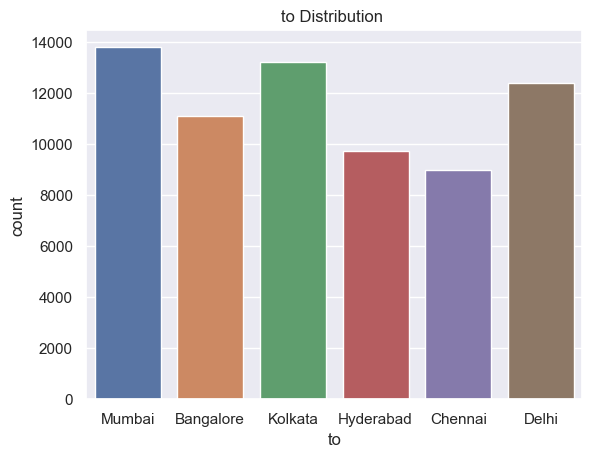

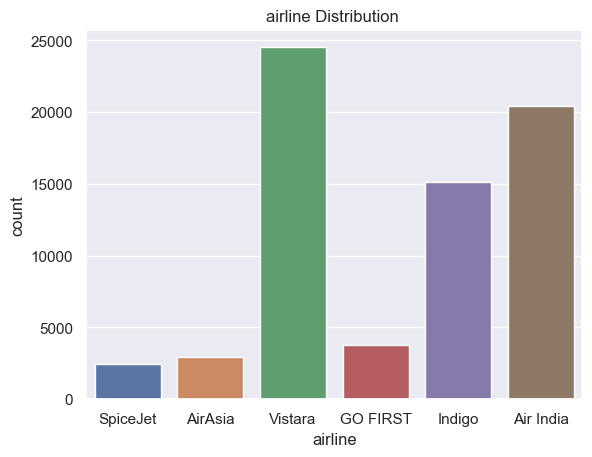

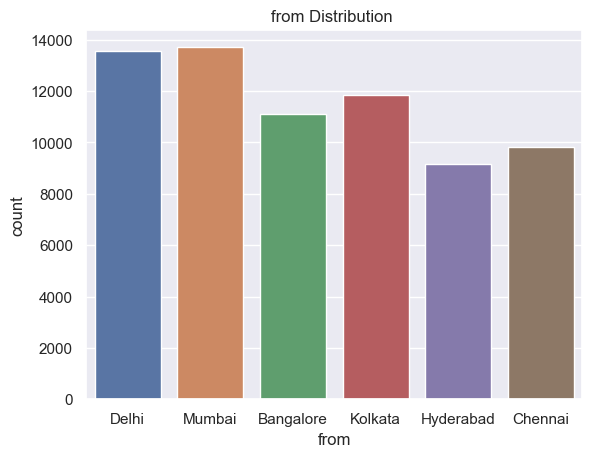

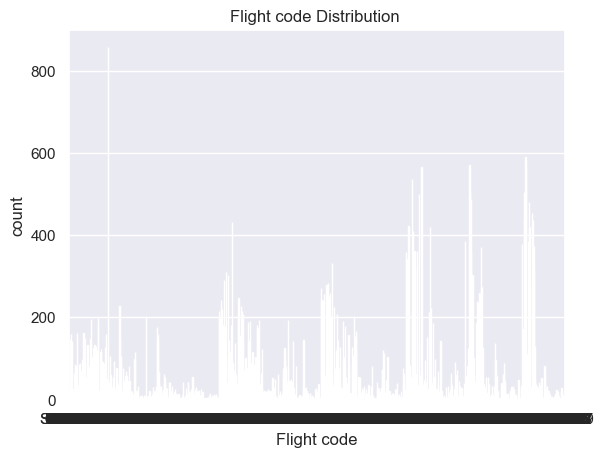

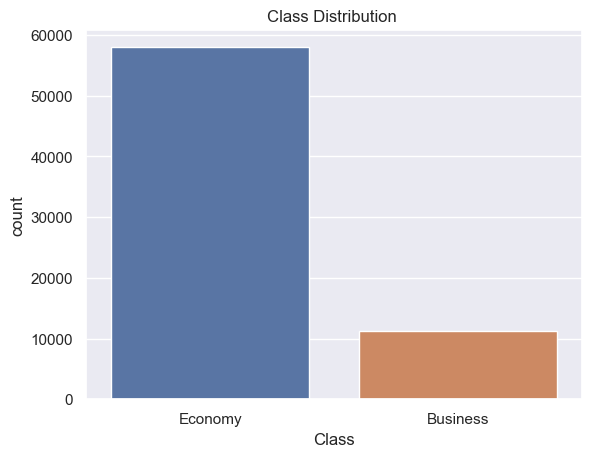

In [121]:
#Plotting the Categorical values and there counts

for i in cat_col:
    sns.set()
    sns.countplot(x = i, data = df)
    plt.title(f"{i} Distribution ")
    plt.show()

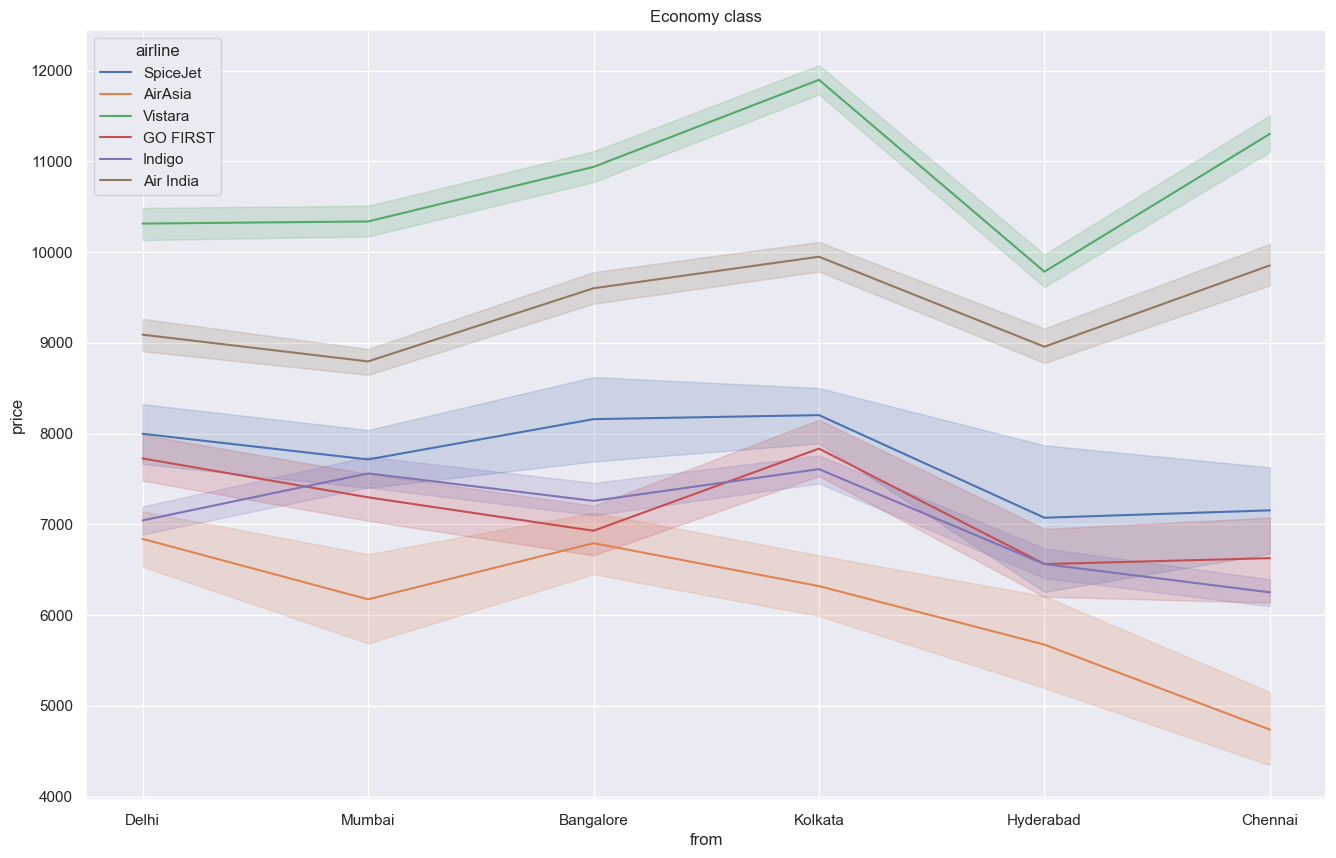

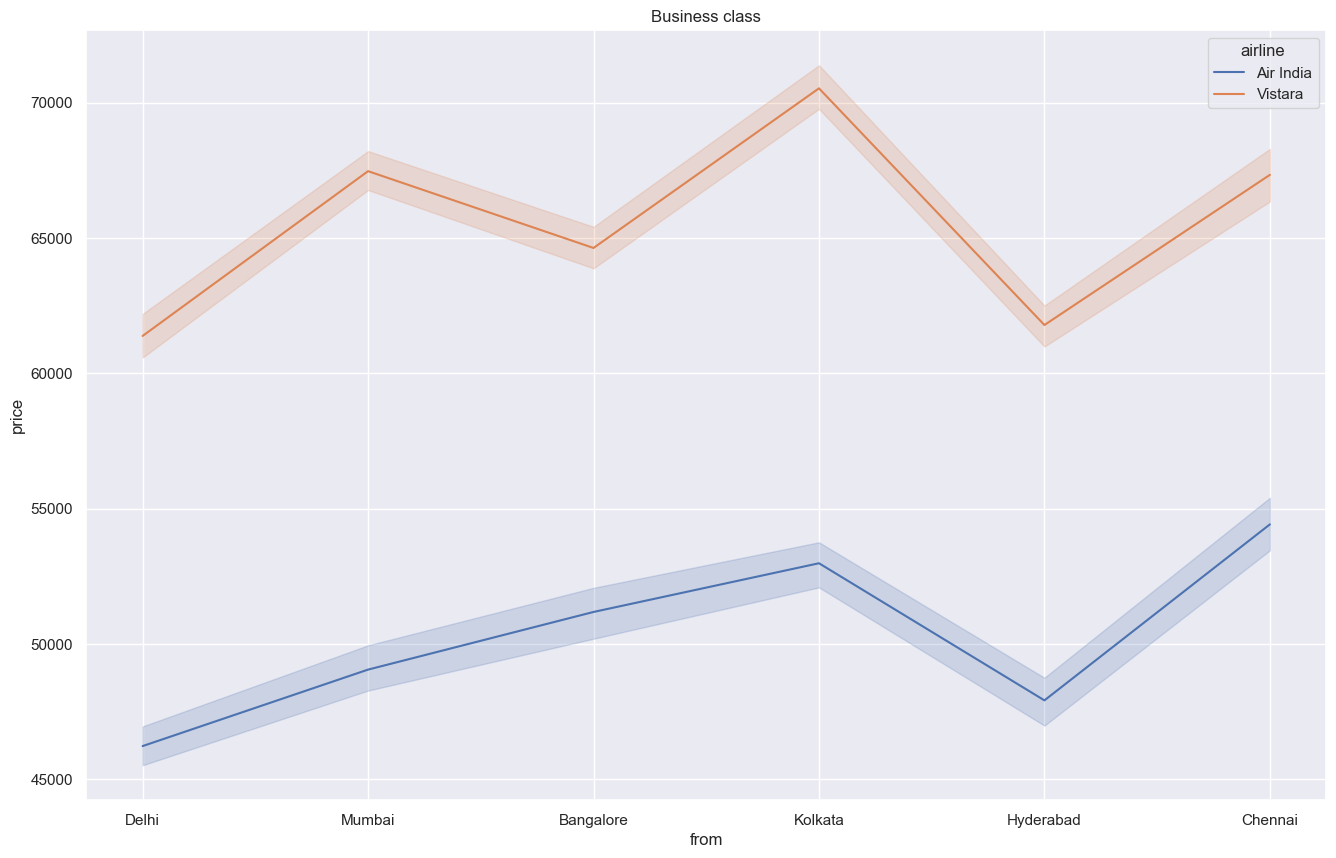

In [122]:
#Plotting Flight Prices based on the Source City

df_economy = df[df['Class'] == 'Economy']
df_business = df[df['Class'] == 'Business']


sns.set()
plt.figure(figsize = (16, 10))
sns.lineplot(data = df_economy, x = 'from', y = 'price', hue = 'airline')
plt.title("Economy class")
plt.show()


sns.set()
plt.figure(figsize = (16, 10))
sns.lineplot(data = df_business, x = 'from', y = 'price', hue = 'airline')
plt.title("Business class")
plt.show()

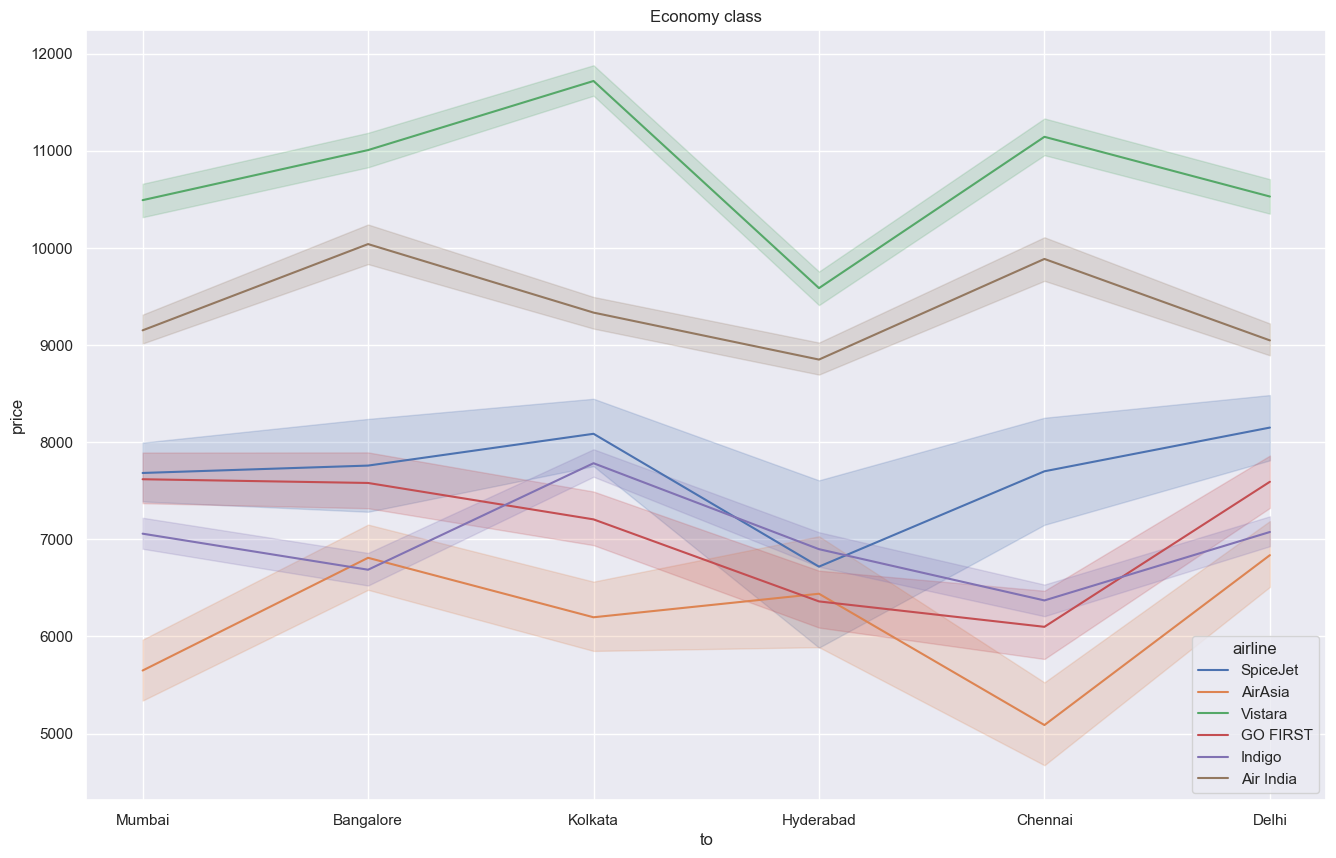

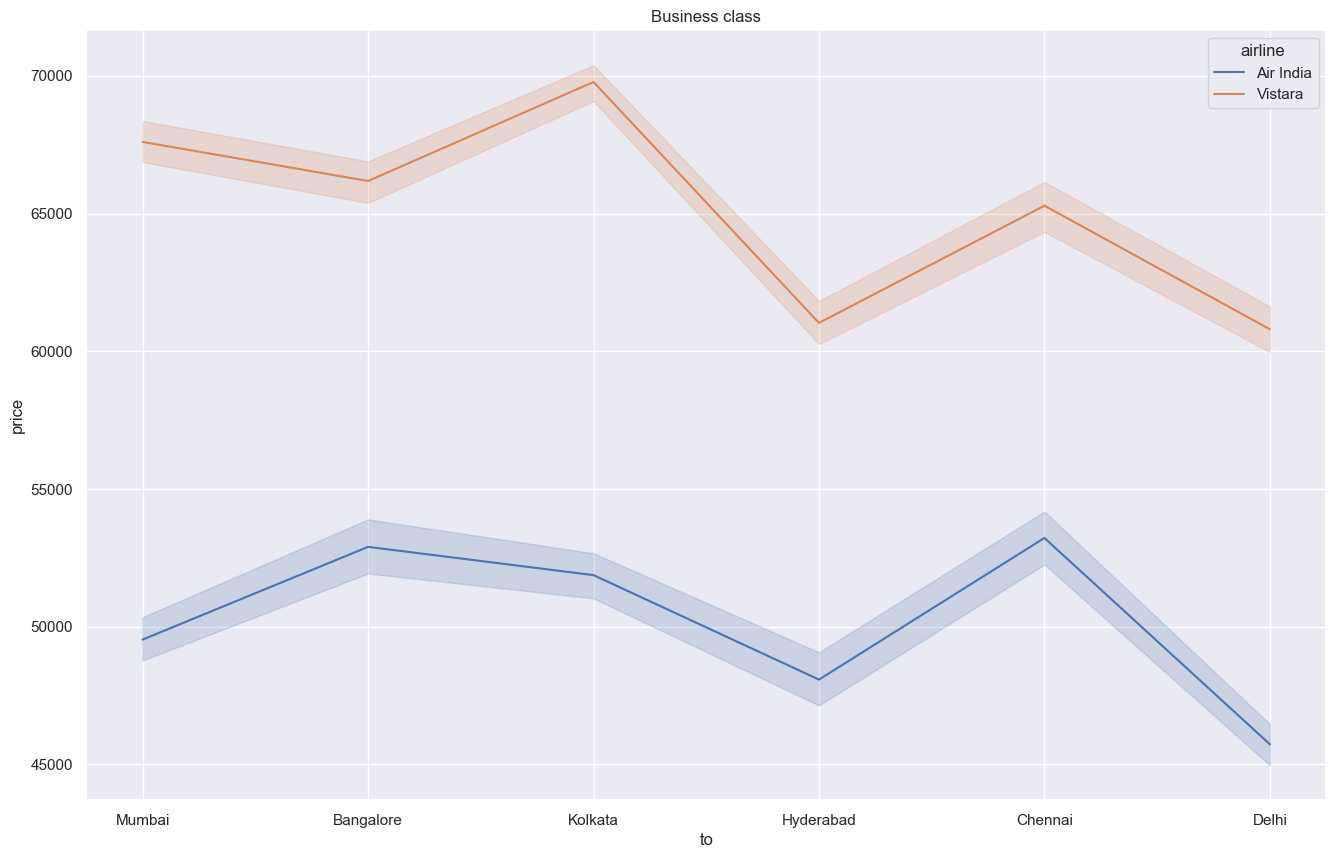

In [123]:
sns.set()
plt.figure(figsize = (16, 10))
sns.lineplot(data = df_economy, x = 'to', y = 'price', hue = 'airline')
plt.title("Economy class")
plt.show()


sns.set()
plt.figure(figsize = (16, 10))
sns.lineplot(data = df_business, x = 'to', y = 'price', hue = 'airline')
plt.title("Business class")
plt.show()

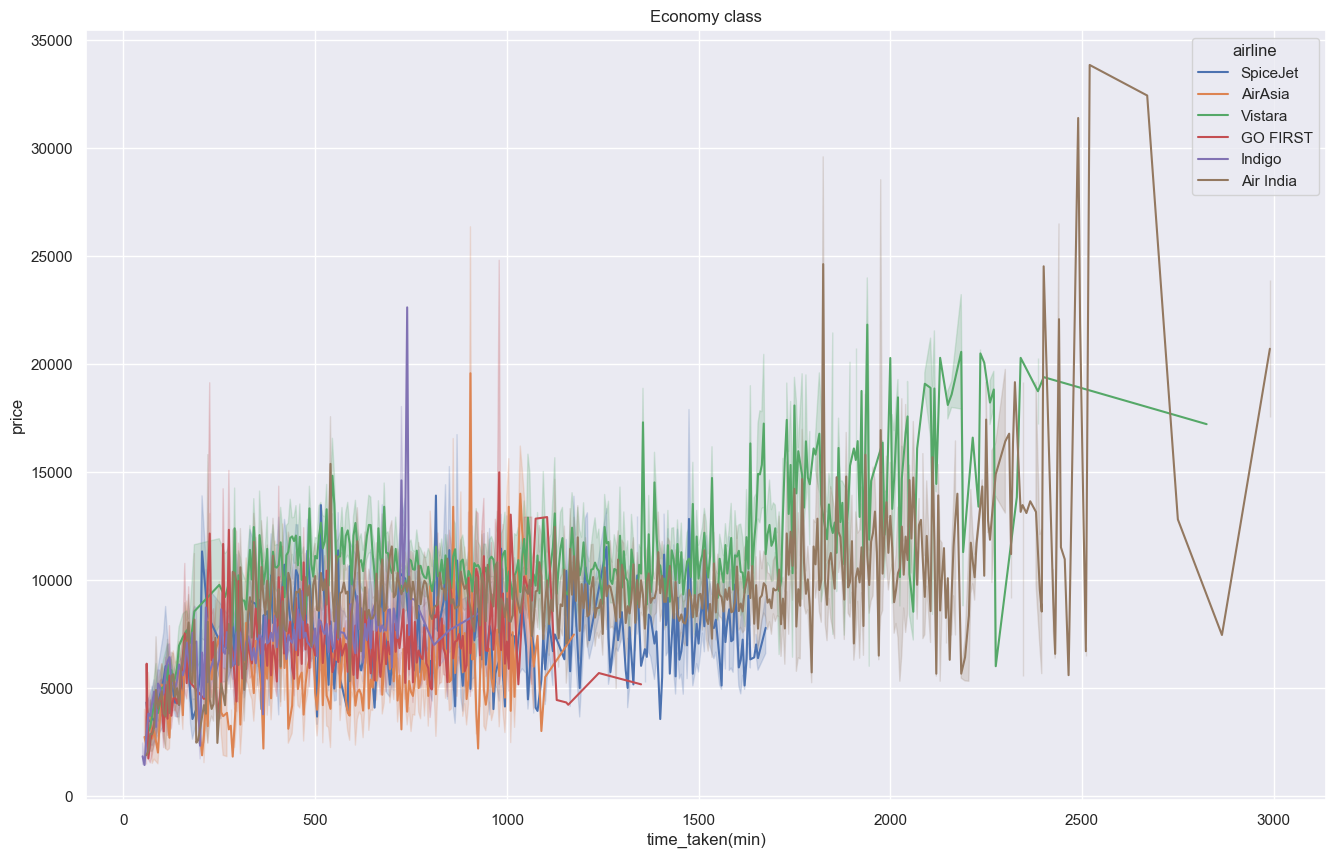

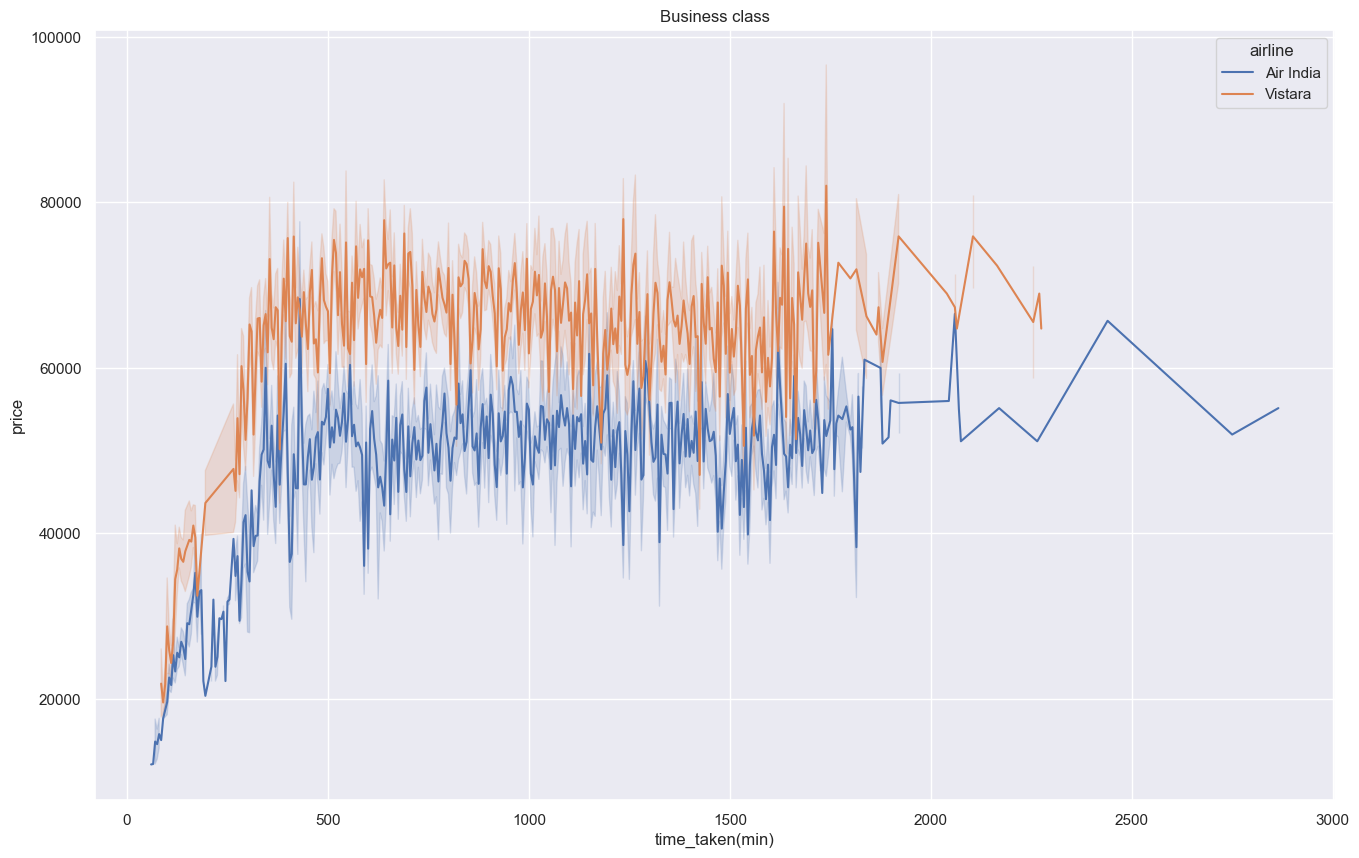

In [124]:
sns.set()
plt.figure(figsize = (16, 10))
sns.lineplot(data = df_economy, x = 'time_taken(min)', y = 'price', hue = 'airline')
plt.title("Economy class")
plt.show()


sns.set()
plt.figure(figsize = (16, 10))
sns.lineplot(data = df_business, x = 'time_taken(min)', y = 'price', hue = 'airline')
plt.title("Business class")
plt.show()

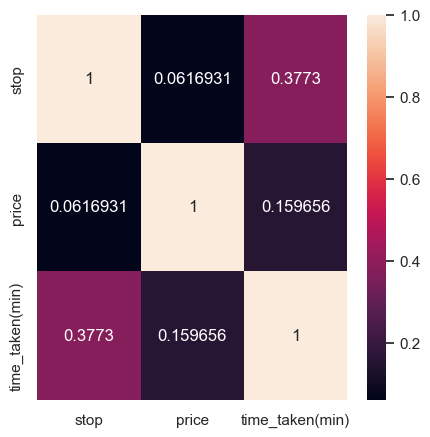

In [125]:
sns.set()
plt.figure(figsize = (5, 5))
sns.heatmap(data = df.corr(), fmt = 'g', annot = True)
plt.show()

In [126]:
df.to_csv('../Data/cleaned_flight_dataset.csv', index=False)